### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

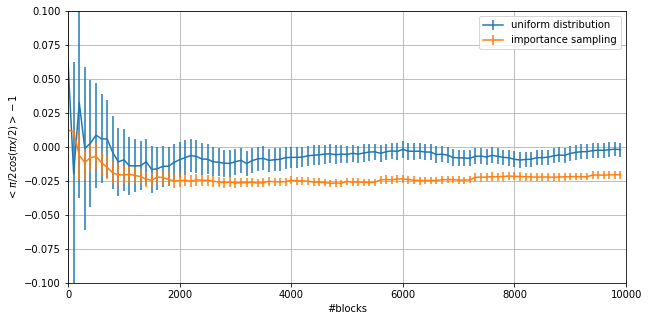

In [38]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=10**4               # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]

x*=L

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es2_1/Data/int_uni.out", usecols=(0,1), delimiter=' ', unpack='true')
ax.errorbar(x,f-1,yerr=error, label='uniform distribution')

ax.set_xlabel('#blocks')
ax.set_ylabel('$<\pi/2 cos( \pi x/2)>-1$')
ax.grid(True)

f, error = np.loadtxt("Es2_1/Data/int_samp.out", usecols=(0,1), delimiter=' ', unpack='true')
ax.errorbar(x,f-1,yerr=error, label='importance sampling')

ax.set_xlim((0,10000))
ax.set_ylim((-0.1,0.1))
ax.legend()

plt.show()

Il grafico mostra come entrambi i campionamenti vanno a convergenza e, come atteso, la barre di errore date dall'importance sampling sono minori rispetto all'applicazione di una distribuzione uniforme.
Va però notato che nel caso dell'importance sampling, il valore dell'integrale non converge esattamente con il valore vero. Questo perchè come sampling è stato utilizzato lo sviluppo in serie della funione al secondo ordine $f(x) = \frac{\pi}{2} - \frac{\pi^3 x^2}{16}$, la quale approssima la funzione originaria da sotto come illustrato nel grafico sottostante. Questo comporta l'esclusione di alcuni punti per la valutazione dell'integrale e dunque un valore inferiore.

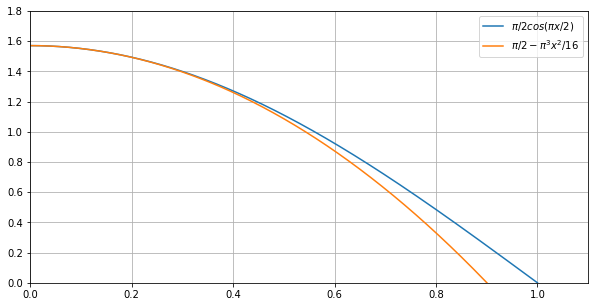

In [35]:
from math import cos, pi

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

x = np.linspace(0, 1, 1000)
uni = []
imp = []

for i in range(len(x)):
    uni.append( pi/2 * cos(pi * x[i] /2) )
    imp.append( pi/2 - (pi**3 * x[i]**2) / 16 )
    
ax.plot(x, uni, label=r'$\pi/2 cos(\pi x /2)$')
ax.plot(x, imp, label=r'$\pi/2 - \pi^3 x^2 / 16 $')

ax.set_xlim(0,1.1)
ax.set_ylim(0,1.8)
ax.grid(True)
ax.legend()
plt.show()

### Exercise 02.2
3D Random Walks (RW) on a cubic lattice and in the continuum.
$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ 

1. on a cubic lattice with lattice constant $a=1$;

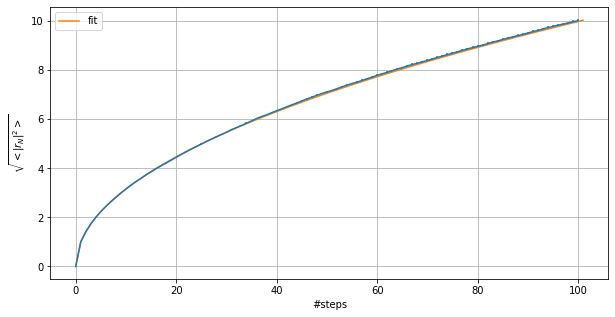

[0.99817162]


In [78]:
from scipy.optimize import curve_fit
from math import sqrt

def fit(x, k):
    return k * x**(1/2)
N = 100


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es2_2/Data/reticolo.out", usecols=(0,1), delimiter=' ', unpack='true')
x = [*range(len(f))]
ax.errorbar(x,f,yerr=error)

x = np.linspace(0, 101, 101)
popt, _ = curve_fit(fit, x, f, p0=[1.])
ax.plot(x, fit(x, *popt), label='fit')
ax.legend()


ax.set_xlabel('#steps')
ax.set_ylabel('$\sqrt{<|r_N|^2>}$')
ax.grid(True)
plt.show()

print(popt)

2. in the continuum;

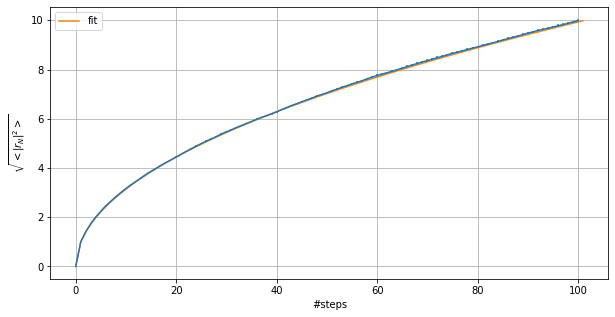

[0.99334204]


In [79]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

f, error = np.loadtxt("Es2_2/Data/continuo.out", usecols=(0,1), delimiter=' ', unpack='true')
x = [*range(len(f))]
ax.errorbar(x,f,yerr=error)

x = np.linspace(0, 101, 101)
popt, _ = curve_fit(fit, x, f, p0=[1.])
ax.plot(x, fit(x, *popt), label='fit')
ax.legend()

ax.set_xlabel('#steps')
ax.set_ylabel('$\sqrt{<|r_N|^2>}$')
ax.grid(True)
plt.show()

print(popt)

In entrambi i casi i dati sono fittabili in modo molto accurato con una funzione del tipo $f(N)=k\sqrt{N}$.
Questo andamento indica un comportamento diffusivo, in quanto dalla soluzione dell'equazione di diffusione $<x^2> = 2 D t$ dove $t$ è qui rappresentato dagli step $N$.